In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.descriptivestats import describe, Description

from statsmodels.miscmodels.ordinal_model import OrderedModel
#https://www.statsmodels.org/stable/generated/statsmodels.miscmodels.ordinal_model.OrderedModel.html#statsmodels.miscmodels.ordinal_model.OrderedModel

from patsy import dmatrix
import seaborn as sns
#import seaborn.objects as so (cannot install)

import scipy as sp
import scipy.stats as stats

import watermark

In [2]:
%reload_ext watermark
%watermark

Last updated: 2022-12-04T20:38:12.172074-05:00

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [3]:
%watermark --iv  

statsmodels: 0.13.2
numpy      : 1.22.2
watermark  : 2.3.0
scipy      : 1.7.3
pandas     : 1.4.4
seaborn    : 0.11.2
json       : 2.0.9
matplotlib : 3.5.3



In [4]:
wv = pd.read_stata('WV3.dta', convert_categoricals=False)

In [5]:
wv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77818 entries, 0 to 77817
Columns: 332 entries, V1 to N_TOWN
dtypes: float32(49), float64(2), int16(257), int32(24)
memory usage: 61.6 MB


In [6]:
# select variables
wv1=wv.loc[:,['V133', 'V214', 'V216', 'V217', 'V89', 'V220', 'V221', 
               'V226', 'V205', 'V90', 'V13', 'V63', 'V124', 'V31', 'V32', 'V182']]

In [7]:
# rename columns
wv1.columns = ["trade", "sex", "age","education", "marital", "housewife", "occupation",
             'class', 'pride', 'n_kids', 'responsibility', 'job_nationality', 'immigration', 'union', 'party',
             'religious']

In [8]:
dt = wv1.copy()

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77818 entries, 0 to 77817
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   trade            77818 non-null  int16
 1   sex              77818 non-null  int16
 2   age              77818 non-null  int16
 3   education        77818 non-null  int16
 4   marital          77818 non-null  int16
 5   housewife        77818 non-null  int16
 6   occupation       77818 non-null  int16
 7   class            77818 non-null  int16
 8   pride            77818 non-null  int16
 9   n_kids           77818 non-null  int16
 10  responsibility   77818 non-null  int16
 11  job_nationality  77818 non-null  int16
 12  immigration      77818 non-null  int16
 13  union            77818 non-null  int16
 14  party            77818 non-null  int16
 15  religious        77818 non-null  int16
dtypes: int16(16)
memory usage: 3.0 MB


In [10]:
dt.head(10)

,trade,sex,age,education,marital,housewife,occupation,class,pride,n_kids,responsibility,job_nationality,immigration,union,party,religious
0,2,2,18,4,6,6,13,3,2,0,1,1,2,3,3,1
1,1,1,18,5,6,6,8,3,2,0,1,1,2,3,3,2
2,2,2,24,3,6,-1,13,4,2,0,2,1,2,3,3,1
3,2,1,26,4,6,1,7,3,3,0,1,1,2,3,3,1
4,2,2,30,3,1,-1,13,3,2,1,1,1,2,3,3,1
5,2,2,38,9,1,2,3,3,2,2,2,1,2,3,3,1
6,2,1,35,3,6,3,7,4,2,0,2,1,2,3,3,2
7,2,1,41,9,1,1,3,3,3,2,1,1,2,3,3,2
8,2,2,55,3,1,-1,9,3,1,3,1,1,3,3,2,2
9,2,1,66,3,1,4,6,3,1,4,1,1,3,3,2,1


In [11]:
dt.describe()

,trade,sex,age,education,marital,housewife,occupation,class,pride,n_kids,responsibility,job_nationality,immigration,union,party,religious
count,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000,77818.000000
mean,1.080046,1.517271,40.819656,5.153422,2.298800,2.894510,6.316945,3.154861,1.395281,1.576512,1.002107,0.787414,1.388329,2.547675,2.616194,0.680691
std,1.590829,0.505000,16.005054,2.858695,2.448677,2.592194,4.569377,1.272768,1.356219,2.009855,1.353689,1.826974,1.775586,1.189227,1.176190,1.718520
min,-4.000000,-2.000000,-2.000000,-4.000000,-4.000000,-4.000000,-5.000000,-2.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,1.000000,1.000000,28.000000,3.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000
50%,2.000000,2.000000,38.000000,5.000000,1.000000,3.000000,7.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000
75%,2.000000,2.000000,52.000000,7.000000,5.000000,5.000000,9.000000,4.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,3.000000,1.000000
max,3.000000,2.000000,95.000000,9.000000,6.000000,8.000000,14.000000,5.000000,5.000000,8.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000


In [12]:
dt.isna().sum()
# no missing values

trade              0
sex                0
age                0
education          0
marital            0
housewife          0
occupation         0
class              0
pride              0
n_kids             0
responsibility     0
job_nationality    0
immigration        0
union              0
party              0
religious          0
dtype: int64

# DV

In [13]:
## recategorize variables
dt['trade'] = dt['trade'].replace([-2, -4], np.NaN)
dt['trade'] = dt['trade'].replace([2], 13)# 2: limit --> 3
dt['trade'] = dt['trade'].replace([1], 12)# 1: support goods--> 2
dt['trade'] = dt['trade'].replace([-1, 3], 11) # -1: DK, 2: other. --> 1


# reclassify
dt['trade'] = dt['trade'].replace([11], 'other') # other+dk
dt['trade'] = dt['trade'].replace([12], 'support') # support goods
dt['trade'] = dt['trade'].replace([13], 'limit') # limit

## convert to category
dt['trade']= pd.Categorical(dt['trade'], categories = ['support', 'limit', 'other'], ordered = False) 

# check if values are replaced
dt['trade'].value_counts()

# I set support as reference level


limit      42858
support    24819
other       4542
Name: trade, dtype: int64

In [14]:
dt['trade'].dtype

CategoricalDtype(categories=['support', 'limit', 'other'], ordered=False)

# IVs

In [15]:
## sex
## recategorize variables
dt['sex'] = dt['sex'].replace([-1, -2, -4], np.NaN)
dt['sex'] = dt['sex'].replace([1], 0) # male 0
dt['sex'] = dt['sex'].replace([2], 1) # female 2->1

# check if values are replaced
dt['sex'] = pd.Categorical(dt['sex'])
dt['sex'].value_counts()


1.0    40379
0.0    37382
Name: sex, dtype: int64

In [16]:
## education
dt['education'] = dt['education'].replace([-1, -2, -3, -4], np.NaN)
#reclassify
dt['education'] = dt['education'].replace([1], 1)# 'no_educ'
dt['education'] = dt['education'].replace([2,3], 2)# 'primary_educ'
dt['education'] = dt['education'].replace([4,5, 6,7], 3 )#'secondary_educ'
dt['education'] = dt['education'].replace([8, 9], 4)# 'university'
dt['education'] = pd.Categorical(dt['education'], categories = [1, 2,3, 4], ordered = False)
dt['education'].value_counts()

3    39401
4    16570
2    16184
1     2790
Name: education, dtype: int64

In [17]:
## V220 Employment status--> whether housewife
dt['housewife'] = dt['housewife'].replace([-1, -2, -4], np.NaN)
dt['housewife'] = dt['housewife'].replace([1,2, 3, 4, 6, 7, 8], 0)
dt['housewife'] = dt['housewife'].replace([5], 1) # housewife
dt['housewife'] = pd.Categorical(dt['housewife'])
dt['housewife'].value_counts()

0.0    64076
1.0     9843
Name: housewife, dtype: int64

In [18]:
# V221 Occupation/job, 3, 2, 1
dt['occupation'] = dt['occupation'].replace([-1, -2, -3, -4, -5, 12, 13, 14], np.NaN)
dt['occupation'] = dt['occupation'].replace([1, 2, 4, 6], 23) # 3: manager
dt['occupation'] = dt['occupation'].replace([ 3, 5, 7, 8], 22) # 2: skilled
dt['occupation'] = dt['occupation'].replace([9, 10, 11], 21)# 1: low-skilled
# reclassify:
dt['occupation'] = dt['occupation'].replace([23], 3)
dt['occupation'] = dt['occupation'].replace([22], 2)
dt['occupation'] = dt['occupation'].replace([21], 1)
dt['occupation'] = pd.Categorical(dt['occupation'], categories = [1, 2,3], ordered = False)
dt['occupation'].value_counts()

2    33285
1    13061
3    11859
Name: occupation, dtype: int64

In [19]:
## 'class'
dt['class'] = dt['class'].replace([-1, -2, -4], np.NaN)
dt['class'] = dt['class'].replace([1], 9) #upper: 4
dt['class'] = dt['class'].replace([2, 3], 8) #middle: 3
dt['class'] = dt['class'].replace([4], 7) #working: 2
dt['class'] = dt['class'].replace([5], 6)# lower: 1

# reclassify:
dt['class'] = dt['class'].replace([9], 4)
dt['class'] = dt['class'].replace([8], 3) 
dt['class'] = dt['class'].replace([7], 2)
dt['class'] = dt['class'].replace([6], 1)

dt['class'] = pd.Categorical(dt['class'], categories = [1, 2,3, 4], ordered = False)
dt['class'].value_counts()

3    42414
2    22196
1     8821
4     1277
Name: class, dtype: int64

In [20]:
## 'pride'
dt['pride'] = dt['pride'].replace([-1, -2, -4, 5], np.NaN)
dt['pride'] = dt['pride'].replace([2], 1) # 1: very proud. 2: quite proud --> to 1
dt['pride'] = dt['pride'].replace([3, 4], 0)
dt['pride'].value_counts()
dt['pride'] = pd.Categorical(dt['pride'])

In [21]:
## 'union'
dt['union'] = dt['union'].replace([-1, -2, -4], np.NaN)
dt['union'] = dt['union'].replace([2], 1)
dt['union'] = dt['union'].replace([3], 0)
dt['union'].value_counts()
dt['union'] = pd.Categorical(dt['union'])

In [22]:
## 'party'
dt['party'] = dt['party'].replace([-1, -2, -4], np.NaN)
dt['party'] = dt['party'].replace([2], 1)
dt['party'] = dt['party'].replace([3], 0)
dt['party'].value_counts()
dt['party'] = pd.Categorical(dt['party'])

In [23]:
## 'religious'
dt['religious'] = dt['religious'].replace([-1, -2, -3, -4, 4], np.NaN)
dt['religious'] = dt['religious'].replace([2, 3], 0) # not religious
dt['religious'].value_counts()
dt['religious'] = pd.Categorical(dt['religious'])

## main IVs

gender-related burdens, I use four indicators: “V89 Marital status”, “V90 How many children”, “V13 Parents responsibilities to their children”.


In [24]:
## v89 marital
dt['marital'] = dt['marital'].replace([-1, -2, -4], np.NaN)

### reclassify data
dt['marital'] = dt['marital'].replace([1, 2], 1) # married + as married
dt['marital'] = dt['marital'].replace([3,4,5, 6], 0) # single, divorced, seprated, widowed
dt['marital'] = pd.Categorical(dt['marital'])
dt['marital'].value_counts()

1.0    48923
0.0    25716
Name: marital, dtype: int64

In [25]:
## number of 'kids'
dt['n_kids'] = dt['n_kids'].replace([-2, -4], np.NaN)
dt['n_kids'].value_counts()

2.0    21203
0.0    19628
1.0    12668
3.0    10653
4.0     4948
5.0     2312
6.0     1117
8.0      856
7.0      630
Name: n_kids, dtype: int64

In [26]:
## 'responsibility'
dt['responsibility'] = dt['responsibility'].replace([-1, -2, -4, 3], np.NaN) # 3: neither
dt['responsibility'] = dt['responsibility'].replace([2], 0) # parents should not sacrifice
dt['responsibility'] = pd.Categorical(dt['responsibility'])
dt['responsibility'].value_counts()

1.0    51179
0.0    16990
Name: responsibility, dtype: int64

In [27]:
## 'job nationality': jobs for our nationality
dt['job_nationality'] = dt['job_nationality'].replace([-1, -2, -4, 2], np.NaN) # 2: neither
dt['job_nationality'] = dt['job_nationality'].replace([1], 0)# agree jobs only for our national citizens. put it differently, limit immigrantion jobs
dt['job_nationality'] = dt['job_nationality'].replace([3], 1)# 3: disagree with jobs only for our national citizens. in other words, support immigrant find jobs
dt['job_nationality'] = pd.Categorical(dt['job_nationality'])
dt['job_nationality'].value_counts()

0.0    49081
1.0    11116
Name: job_nationality, dtype: int64

In [28]:
## 'immigration'
dt['immigration'] = dt['immigration'].replace([-1, -2, -4], np.NaN)
dt['immigration'] = dt['immigration'].replace([2], 1)
dt['immigration'] = dt['immigration'].replace([3, 4], 0)
dt['immigration'] = pd.Categorical(dt['immigration'])
dt['immigration'].value_counts()

1.0    55705
0.0    10672
Name: immigration, dtype: int64

In [29]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77818 entries, 0 to 77817
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trade            72219 non-null  category
 1   sex              77761 non-null  category
 2   age              77818 non-null  int16   
 3   education        74945 non-null  category
 4   marital          74639 non-null  category
 5   housewife        73919 non-null  category
 6   occupation       58205 non-null  category
 7   class            74708 non-null  category
 8   pride            72231 non-null  category
 9   n_kids           74015 non-null  float64 
 10  responsibility   68169 non-null  category
 11  job_nationality  60197 non-null  category
 12  immigration      66377 non-null  category
 13  union            75627 non-null  category
 14  party            75684 non-null  category
 15  religious        66362 non-null  category
dtypes: category(14), float64(1), int16(1)
me

In [30]:
dt.describe()

,age,n_kids
count,77818.000000,74015.000000
mean,40.819656,1.842127
std,16.005054,1.664362
min,-2.000000,0.000000
25%,28.000000,0.000000
50%,38.000000,2.000000
75%,52.000000,3.000000
max,95.000000,8.000000


In [31]:
dt= dt.dropna()

In [32]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30252 entries, 1 to 77817
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trade            30252 non-null  category
 1   sex              30252 non-null  category
 2   age              30252 non-null  int16   
 3   education        30252 non-null  category
 4   marital          30252 non-null  category
 5   housewife        30252 non-null  category
 6   occupation       30252 non-null  category
 7   class            30252 non-null  category
 8   pride            30252 non-null  category
 9   n_kids           30252 non-null  float64 
 10  responsibility   30252 non-null  category
 11  job_nationality  30252 non-null  category
 12  immigration      30252 non-null  category
 13  union            30252 non-null  category
 14  party            30252 non-null  category
 15  religious        30252 non-null  category
dtypes: category(14), float64(1), int16(1)
me

In [33]:
# convert float to int
for v in dt.columns.values:
    if dt[v].dtype == 'float64':
        dt[v] = dt[v].astype('int64')
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30252 entries, 1 to 77817
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trade            30252 non-null  category
 1   sex              30252 non-null  category
 2   age              30252 non-null  int16   
 3   education        30252 non-null  category
 4   marital          30252 non-null  category
 5   housewife        30252 non-null  category
 6   occupation       30252 non-null  category
 7   class            30252 non-null  category
 8   pride            30252 non-null  category
 9   n_kids           30252 non-null  int64   
 10  responsibility   30252 non-null  category
 11  job_nationality  30252 non-null  category
 12  immigration      30252 non-null  category
 13  union            30252 non-null  category
 14  party            30252 non-null  category
 15  religious        30252 non-null  category
dtypes: category(14), int16(1), int64(1)
memo

In [34]:
# check values in each variable
dict = {} 
for v in dt.columns.values:  
    dict[v] = dt[v].unique().tolist() 
dict

{'trade': ['support', 'limit', 'other'],
 'sex': [0.0, 1.0],
 'age': [18,
  26,
  38,
  35,
  41,
  66,
  28,
  44,
  46,
  32,
  59,
  67,
  34,
  40,
  42,
  50,
  43,
  45,
  55,
  74,
  54,
  56,
  68,
  48,
  63,
  75,
  24,
  33,
  39,
  47,
  64,
  49,
  25,
  52,
  65,
  20,
  19,
  23,
  31,
  60,
  36,
  51,
  62,
  76,
  29,
  30,
  61,
  27,
  22,
  58,
  37,
  53,
  69,
  57,
  77,
  21,
  70,
  72,
  71,
  -2,
  73,
  83,
  78,
  85,
  88,
  79,
  17,
  82,
  81,
  80,
  16,
  15,
  90,
  84,
  86,
  91,
  89,
  92,
  87,
  93,
  -1,
  94],
 'education': [3, 4, 2, 1],
 'marital': [0.0, 1.0],
 'housewife': [0.0, 1.0],
 'occupation': [2, 3, 1],
 'class': [3, 2, 1, 4],
 'pride': [1.0, 0.0],
 'n_kids': [0, 2, 4, 3, 1, 5, 6, 7, 8],
 'responsibility': [1.0, 0.0],
 'job_nationality': [0.0, 1.0],
 'immigration': [1.0, 0.0],
 'union': [0.0, 1.0],
 'party': [0.0, 1.0],
 'religious': [0.0, 1.0]}

# Model 1 (not divided by sex)

In [35]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30252 entries, 1 to 77817
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trade            30252 non-null  category
 1   sex              30252 non-null  category
 2   age              30252 non-null  int16   
 3   education        30252 non-null  category
 4   marital          30252 non-null  category
 5   housewife        30252 non-null  category
 6   occupation       30252 non-null  category
 7   class            30252 non-null  category
 8   pride            30252 non-null  category
 9   n_kids           30252 non-null  int64   
 10  responsibility   30252 non-null  category
 11  job_nationality  30252 non-null  category
 12  immigration      30252 non-null  category
 13  union            30252 non-null  category
 14  party            30252 non-null  category
 15  religious        30252 non-null  category
dtypes: category(14), int16(1), int64(1)
memo

In [36]:
dt.head(10)

,trade,sex,age,education,marital,housewife,occupation,class,pride,n_kids,responsibility,job_nationality,immigration,union,party,religious
1,support,0.0,18,3,0.0,0.0,2,3,1.0,0,1.0,0.0,1.0,0.0,0.0,0.0
3,limit,0.0,26,3,0.0,0.0,2,3,0.0,0,1.0,0.0,1.0,0.0,0.0,1.0
5,limit,1.0,38,4,1.0,0.0,2,3,1.0,2,0.0,0.0,1.0,0.0,0.0,1.0
6,limit,0.0,35,2,0.0,0.0,2,2,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0
7,limit,0.0,41,4,1.0,0.0,2,3,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0
9,limit,0.0,66,2,1.0,0.0,3,3,1.0,4,1.0,0.0,0.0,0.0,1.0,1.0
13,limit,0.0,28,3,0.0,0.0,2,3,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0
15,limit,1.0,44,4,1.0,0.0,2,3,1.0,2,0.0,0.0,0.0,1.0,0.0,0.0
16,limit,0.0,44,2,1.0,0.0,1,2,1.0,3,1.0,0.0,0.0,0.0,1.0,0.0
17,limit,0.0,46,4,1.0,0.0,3,3,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0


In [91]:
endog = dt['trade']

exog = dt[['sex', 'marital', 'n_kids', 'responsibility', 'housewife', 'job_nationality', 'immigration', 'age', 'class', 'education', 'occupation',
            'union', 'party', 'religious', 'pride']]

m1 = sm.MNLogit(endog, exog).fit()

Optimization terminated successfully.
         Current function value: 0.728794
         Iterations 7


In [38]:
print(m1.summary())

                          MNLogit Regression Results                          
Dep. Variable:                  trade   No. Observations:                30252
Model:                        MNLogit   Df Residuals:                    30222
Method:                           MLE   Df Model:                           28
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:                 0.03460
Time:                        20:38:13   Log-Likelihood:                -22047.
converged:                       True   LL-Null:                       -22838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
    trade=limit       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sex                 0.1195      0.027      4.456      0.000       0.067       0.172
age                 0.0119      0.001     13.500      0.000       0.010       0.014
marital             0.0059      

In [39]:
#print(m1.summary()).as_latex

# model 2 (divided by sex)

In [40]:
# copy data
dt1=dt.copy()
dt1.head()

,trade,sex,age,education,marital,housewife,occupation,class,pride,n_kids,responsibility,job_nationality,immigration,union,party,religious
1,support,0.0,18,3,0.0,0.0,2,3,1.0,0,1.0,0.0,1.0,0.0,0.0,0.0
3,limit,0.0,26,3,0.0,0.0,2,3,0.0,0,1.0,0.0,1.0,0.0,0.0,1.0
5,limit,1.0,38,4,1.0,0.0,2,3,1.0,2,0.0,0.0,1.0,0.0,0.0,1.0
6,limit,0.0,35,2,0.0,0.0,2,2,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0
7,limit,0.0,41,4,1.0,0.0,2,3,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0


In [100]:
# compare data
dt2=wv1.copy()
dt2.head()

,trade,sex,age,education,marital,housewife,occupation,class,pride,n_kids,responsibility,job_nationality,immigration,union,party,religious
0,2,2,18,4,6,6,13,3,2,0,1,1,2,3,3,1
1,1,1,18,5,6,6,8,3,2,0,1,1,2,3,3,2
2,2,2,24,3,6,-1,13,4,2,0,2,1,2,3,3,1
3,2,1,26,4,6,1,7,3,3,0,1,1,2,3,3,1
4,2,2,30,3,1,-1,13,3,2,1,1,1,2,3,3,1


In [101]:
dt2['trade'] = dt2['trade'].replace([-2, -4], np.NaN)

#dt2['trade'] = dt2['trade'].replace([1], 12)# 1: support goods--> 1
#dt2['trade'] = dt2['trade'].replace([2], 13)# 2: limit --> 2
dt2['trade'] = dt2['trade'].replace([-1], 3) # -1: DK, 2: other. --> 3


# reclassify

#dt2['trade'] = dt2['trade'].replace([12], 1) # support goods
#dt2['trade'] = dt2['trade'].replace([13], 2) # limit
#dt2['trade'] = dt2['trade'].replace([11], 3) # other+dk

# set support as base level

## convert to category
#dt2['trade']= pd.Categorical(dt2['trade'], categories = [1, 2, 3], ordered = False) #


In [102]:
#IVs

## sex
### recategorize variables
dt2['sex'] = dt2['sex'].replace([-1, -2, -4], np.NaN)
dt2['sex'] = dt2['sex'].replace([1], 'male') # male 0
dt2['sex'] = dt2['sex'].replace([2], 'female') # female 2->1

###check if values are replaced
dt2['sex'] = pd.Categorical(dt2['sex'])


## married
dt2['marital'] = dt2['marital'].replace([-1, -2, -4], np.NaN)
### reclassify data
dt2['marital'] = dt2['marital'].replace([1, 2], 'married') # married + as married
dt2['marital'] = dt2['marital'].replace([3,4,5, 6], 'other') # single, divorced, seprated, widowed
dt2['marital'] = pd.Categorical(dt2['marital'])

In [103]:
## 'responsibility'
dt2['responsibility'] = dt2['responsibility'].replace([-1, -2, -4, 3], np.NaN) # 3: neither
dt2['responsibility'] = dt2['responsibility'].replace([1], 'sacrifice')
dt2['responsibility'] = dt2['responsibility'].replace([2], 'no_sacrifice') # parents should not sacrifice
dt2['responsibility'] = pd.Categorical(dt2['responsibility'])
dt2['responsibility'].value_counts()

sacrifice       51179
no_sacrifice    16990
Name: responsibility, dtype: int64

In [104]:
## job
dt2['job_nationality'] = dt2['job_nationality'].replace([-1, -2, -4, 2], np.NaN) # 2: neither
dt2['job_nationality'] = dt2['job_nationality'].replace([1], 'restrict_immigrant_job')# agree jobs only for our national citizens. put it differently, limit immigrantion jobs
dt2['job_nationality'] = dt2['job_nationality'].replace([3], 'support_immigrant_job')# 3: disagree with jobs only for our national citizens. in other words, support immigrant find jobs
dt2['job_nationality'] = pd.Categorical(dt2['job_nationality'])
dt2['responsibility'].value_counts()

sacrifice       51179
no_sacrifice    16990
Name: responsibility, dtype: int64

In [105]:
                                                        
## 'immigration'
dt2['immigration'] = dt2['immigration'].replace([-1, -2, -4], np.NaN)
dt2['immigration'] = dt2['immigration'].replace([1, 2], 'support_immigrant')
dt2['immigration'] = dt2['immigration'].replace([3, 4], 'restrict_immigrant')
dt2['immigration'] = pd.Categorical(dt2['immigration'])
dt2['immigration'].value_counts()

support_immigrant     55705
restrict_immigrant    10672
Name: immigration, dtype: int64

In [106]:
## V220 Employment status--> whether housewife
dt['housewife'] = dt['housewife'].replace([-1, -2, -4], np.NaN)
dt['housewife'] = dt['housewife'].replace([1,2, 3, 4, 6, 7, 8], "non-housewife")
dt['housewife'] = dt['housewife'].replace([5], "housewife_") # housewife
dt['housewife'] = pd.Categorical(dt['housewife'])
dt['housewife'].value_counts()

0.0              28469
non-housewife     1783
Name: housewife, dtype: int64

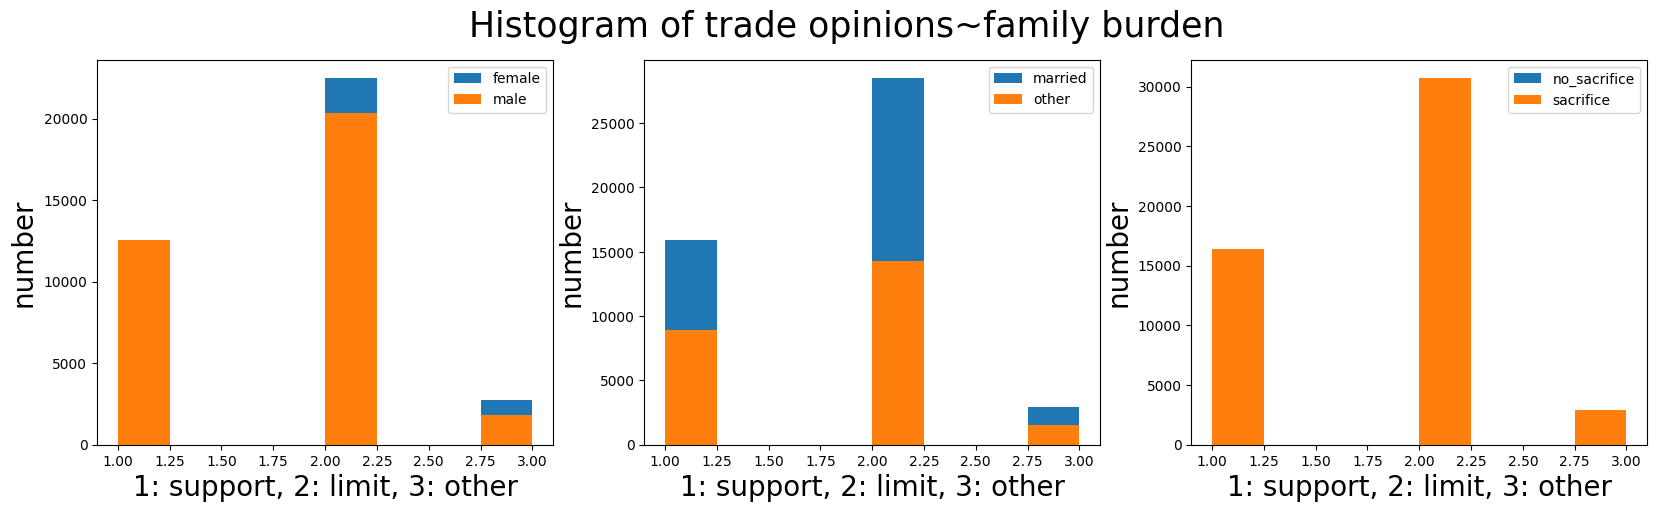

In [110]:
# draw plots for main categorical IVs
fig, axs = plt.subplots(1,3,figsize =(20,5))

for i,v in enumerate(['sex','marital', 'responsibility']):
    ax = axs[i]
    dt2.groupby(v)['trade'].plot(kind='hist',bins=8,legend=True, ax=ax)
    ax.set_xlabel('1: support, 2: limit, 3: other', fontsize=20)
    ax.set_ylabel('number', fontsize=20)
plt.suptitle(t='Histogram of trade opinions~family burden', fontsize =25);

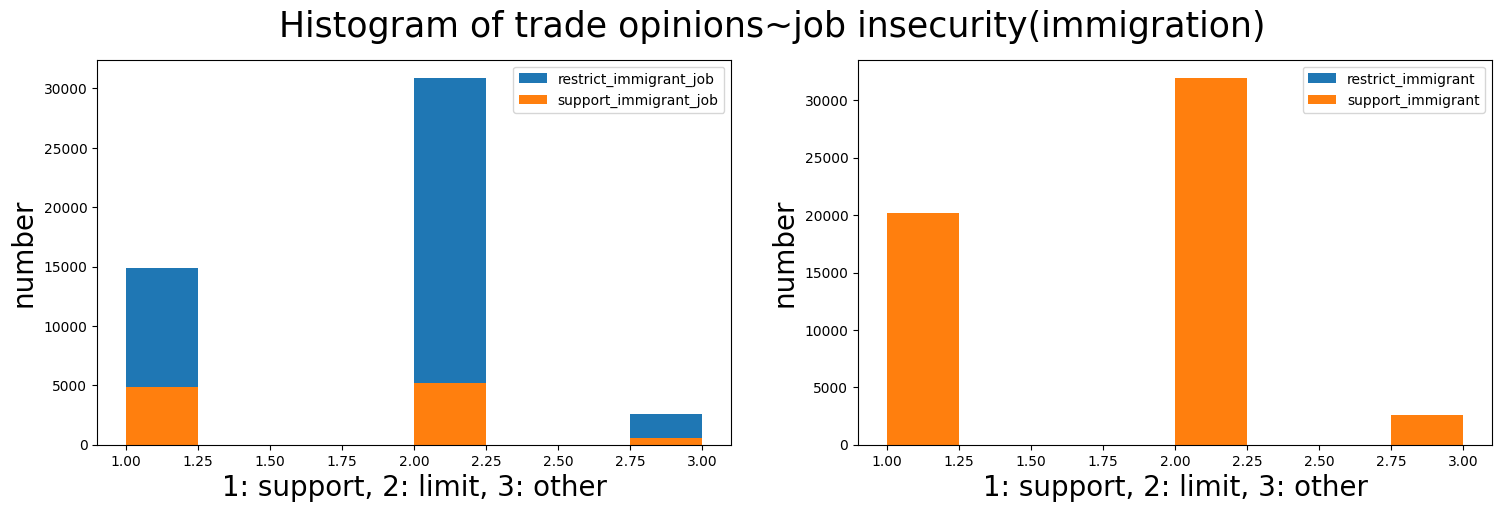

In [113]:
# draw plots for main categorical IVs
fig, axs = plt.subplots(1,2,figsize =(18,5))

for i,v in enumerate(['job_nationality', 'immigration']):
    ax = axs[i]
    dt2.groupby(v)['trade'].plot(kind='hist',bins=8,legend=True, ax=ax)
    ax.set_xlabel('1: support, 2: limit, 3: other', fontsize=20)
    ax.set_ylabel('number', fontsize=20)
plt.suptitle(t="Histogram of trade opinions~job insecurity(immigration)", fontsize =25);

In [45]:
# DV: female trade opinion, after reclassification, sex =1 is female
# only select trade opinion when sex =1
w_trade = dt1[dt1['sex']==1]

In [46]:
w_trade.head()

,trade,sex,age,education,marital,housewife,occupation,class,pride,n_kids,responsibility,job_nationality,immigration,union,party,religious
5,limit,1.0,38,4,1.0,0.0,2,3,1.0,2,0.0,0.0,1.0,0.0,0.0,1.0
15,limit,1.0,44,4,1.0,0.0,2,3,1.0,2,0.0,0.0,0.0,1.0,0.0,0.0
24,limit,1.0,32,2,1.0,0.0,2,2,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0
27,limit,1.0,46,3,1.0,0.0,3,3,1.0,2,1.0,0.0,1.0,0.0,0.0,0.0
28,limit,1.0,59,2,1.0,1.0,2,2,1.0,2,1.0,0.0,1.0,0.0,0.0,0.0


In [47]:
w_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14201 entries, 5 to 77791
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trade            14201 non-null  category
 1   sex              14201 non-null  category
 2   age              14201 non-null  int16   
 3   education        14201 non-null  category
 4   marital          14201 non-null  category
 5   housewife        14201 non-null  category
 6   occupation       14201 non-null  category
 7   class            14201 non-null  category
 8   pride            14201 non-null  category
 9   n_kids           14201 non-null  int64   
 10  responsibility   14201 non-null  category
 11  job_nationality  14201 non-null  category
 12  immigration      14201 non-null  category
 13  union            14201 non-null  category
 14  party            14201 non-null  category
 15  religious        14201 non-null  category
dtypes: category(14), int16(1), int64(1)
memo

Text(0.5, 0.98, "Women's trade preferences")

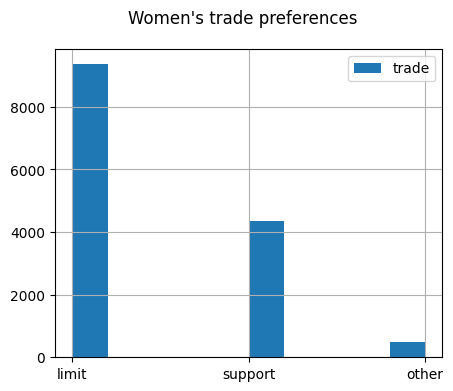

In [112]:
w_trade['trade'].hist(bins=10,legend=True,figsize=(5,4));
plt.suptitle("Women's trade preferences")


In [92]:
# run female trade opinion model
endog2 = w_trade['trade']

exog2 = w_trade[['marital', 'n_kids', 'responsibility', 'housewife', 'job_nationality', 'immigration', 'age', 'class', 'education', 'occupation',
            'union', 'party', 'religious', 'pride']]

m2 = sm.MNLogit(endog2, exog2).fit()

print(m2.summary())

Optimization terminated successfully.
         Current function value: 0.730447
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  trade   No. Observations:                14201
Model:                        MNLogit   Df Residuals:                    14173
Method:                           MLE   Df Model:                           26
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:                 0.03170
Time:                        23:58:43   Log-Likelihood:                -10373.
converged:                       True   LL-Null:                       -10713.
Covariance Type:            nonrobust   LLR p-value:                1.642e-126
    trade=limit       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
marital             0.0029      0.042      0.070      0.945      -0.079       0.085
n_kids        

In [50]:
for attr in dir(m2):
    if not attr.startswith('_'):
        print(attr)

J
K
aic
bic
bse
conf_int
cov_kwds
cov_params
cov_type
df_model
df_resid
f_test
fittedvalues
get_margeff
initialize
k_constant
llf
llnull
llr
llr_pvalue
load
margeff
mle_retvals
mle_settings
model
nobs
normalized_cov_params
params
pred_table
predict
prsquared
pvalues
remove_data
resid_misclassified
resid_response
save
scale
set_null_options
summary
summary2
t_test
t_test_pairwise
tvalues
use_t
wald_test
wald_test_terms


# Testing the proportional odds assumption


In [83]:
# create binary variable for "limit" or "support" vs. "other"
w_trade['support_limit'] = w_trade['trade'].replace({'other':0,'support':1,'limit':1}).cat.codes

# create binary variable for "limit" vs. "support" or "other" 
w_trade['limit'] = w_trade['trade'].replace({'limit':1,'other':0,'support':0,}).cat.codes

w_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14201 entries, 5 to 77791
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   trade            14201 non-null  category
 1   sex              14201 non-null  category
 2   age              14201 non-null  int16   
 3   education        14201 non-null  category
 4   marital          14201 non-null  category
 5   housewife        14201 non-null  category
 6   occupation       14201 non-null  category
 7   class            14201 non-null  category
 8   pride            14201 non-null  category
 9   n_kids           14201 non-null  int64   
 10  responsibility   14201 non-null  category
 11  job_nationality  14201 non-null  category
 12  immigration      14201 non-null  category
 13  union            14201 non-null  category
 14  party            14201 non-null  category
 15  religious        14201 non-null  category
 16  support_limit    14201 non-null  int8   

/var/folders/zs/5yj3xzpx7jl966fqs_fq7tqc0000gn/T/ipykernel_9366/2179617179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_trade['support_limit'] = w_trade['trade'].replace({'other':0,'support':1,'limit':1}).cat.codes
/var/folders/zs/5yj3xzpx7jl966fqs_fq7tqc0000gn/T/ipykernel_9366/2179617179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_trade['limit'] = w_trade['trade'].replace({'limit':1,'other':0,'support':0,}).cat.codes


In [87]:
# run first logit support_limit
Y = w_trade['support_limit']
X = w_trade[['age', 'marital', 'n_kids', 'responsibility', 'housewife', 'job_nationality', 'immigration', 'class', 'education', 'occupation',
            'union', 'party', 'religious', 'pride']]
support_res = sm.Logit(Y, X).fit(full_output=True)
print(support_res.summary())

Optimization terminated successfully.
         Current function value: 0.152398
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          support_limit   No. Observations:                14201
Model:                          Logit   Df Residuals:                    14187
Method:                           MLE   Df Model:                           13
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:               -0.003019
Time:                        22:46:09   Log-Likelihood:                -2164.2
converged:                       True   LL-Null:                       -2157.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                -0.0067      0.003     -2.414      0.016      -0.012      -0.001
marital       

In [88]:
# run second logit limit
Y2 = w_trade['limit']
X2 = w_trade[['age', 'marital', 'n_kids', 'responsibility', 'housewife', 'job_nationality', 'immigration', 'class', 'education', 'occupation',
            'union', 'party', 'religious', 'pride']]
limit_res = sm.Logit(Y2, X2).fit(full_output=True)
print(limit_res.summary())

Optimization terminated successfully.
         Current function value: 0.618665
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  limit   No. Observations:                14201
Model:                          Logit   Df Residuals:                    14187
Method:                           MLE   Df Model:                           13
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:                 0.03550
Time:                        22:47:22   Log-Likelihood:                -8785.7
converged:                       True   LL-Null:                       -9109.1
Covariance Type:            nonrobust   LLR p-value:                7.854e-130
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                -0.0096      0.001     -8.025      0.000      -0.012      -0.007
marital       

In [90]:
# compute the difference between two logits' coefficients. small differebce means good, not violate PRA assumption. big means violates
# for example, T.Germany coefficient does not violate
coefficient_comparison = pd.DataFrame({'supportlimit': support_res.params,
                                      'limit': limit_res.params,
                                     'diff': limit_res.params - support_res.params
                                      }
                                     )
 
coefficient_comparison 

,supportlimit,limit,diff
age,-0.006688,-0.009639,-0.002950
marital,-0.088646,-0.003309,0.085337
n_kids,-0.070471,-0.030559,0.039912
responsibility,-0.114418,-0.209290,-0.094872
housewife,-0.156237,-0.251975,-0.095738
job_nationality,0.270380,0.444875,0.174496
immigration,0.185244,0.401277,0.216033
class,-0.125001,0.070810,0.195811
education,-0.468946,0.031278,0.500223
occupation,-0.268913,-0.051616,0.217298


variables' differences between these two logit models are small, so my model does not violates proportional odds assumption (PRA)